<a href="https://colab.research.google.com/github/vinayastar01/deep-learning-2025/blob/main/Time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-04-20 15:54:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2025-04-20 15:54:58 (7.08 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



Importing Time Series Data

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',parse_dates=['Date'],index_col=['Date'])
df.head()


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [7]:
len(df)

2787

In [8]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':"Price"})

In [9]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


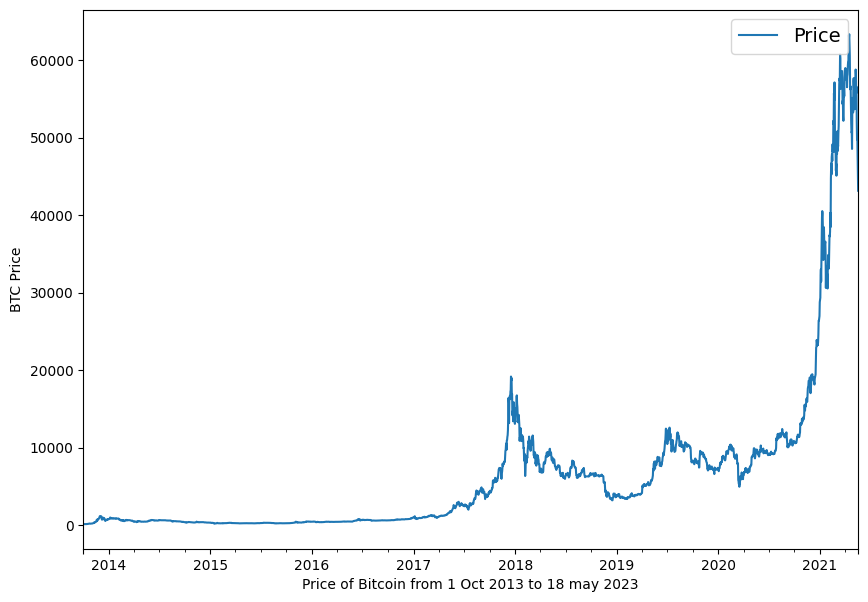

In [10]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.xlabel("Price of Bitcoin from 1 Oct 2013 to 18 may 2023")
plt.legend(fontsize=14);

**Importing time series data with Python's CSV modeule**

In [11]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv','r') as f:
  csv_reader = csv.reader(f,delimiter=',')
  next(csv_reader) #skip first line
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

In [12]:
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

<ipython-input-13-ff3e1a442885>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14);


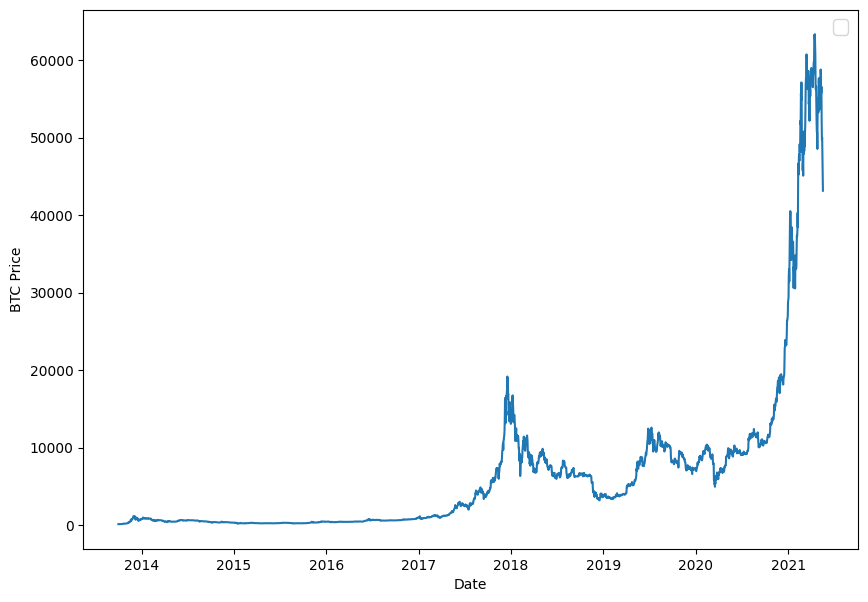

In [13]:
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.legend(fontsize=14);

In [14]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [15]:
timesteps=bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [16]:
timesteps[:10], prices[:10]


(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [17]:
# Wrong way to make train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, test_size=0.2,random_state = 42)

### Create train and test for time series (Correct way)

In [18]:
split_size = int(0.8*len(prices)) # 80% train , 20% test

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

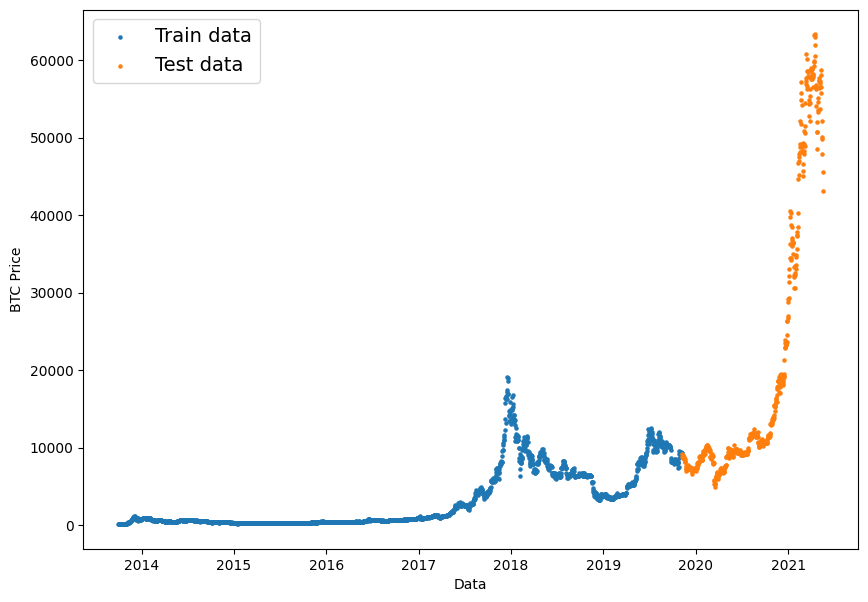

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5, label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Data")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

In [20]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".",start =0, end = None, label=None):
  plt.figure(figsize=(10,7))
  plt.plot(timesteps[start:end],values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

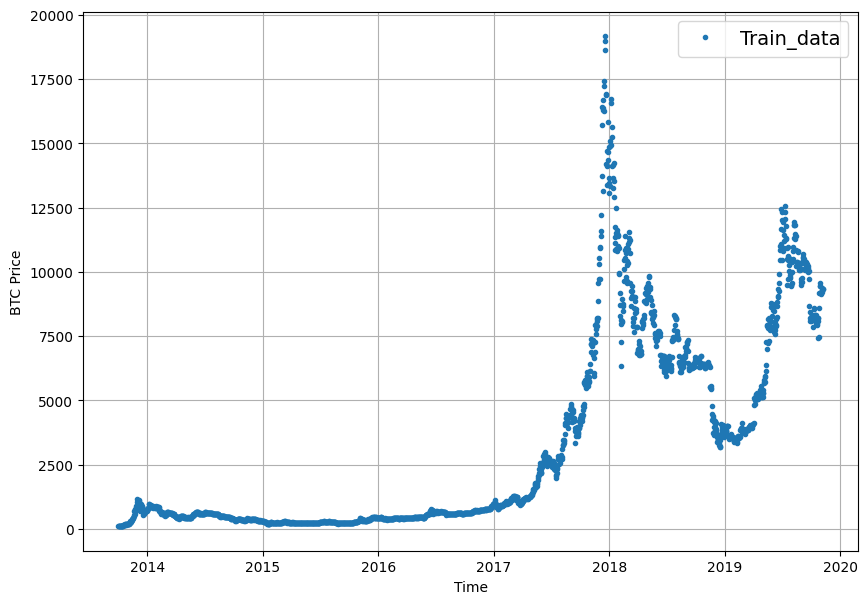

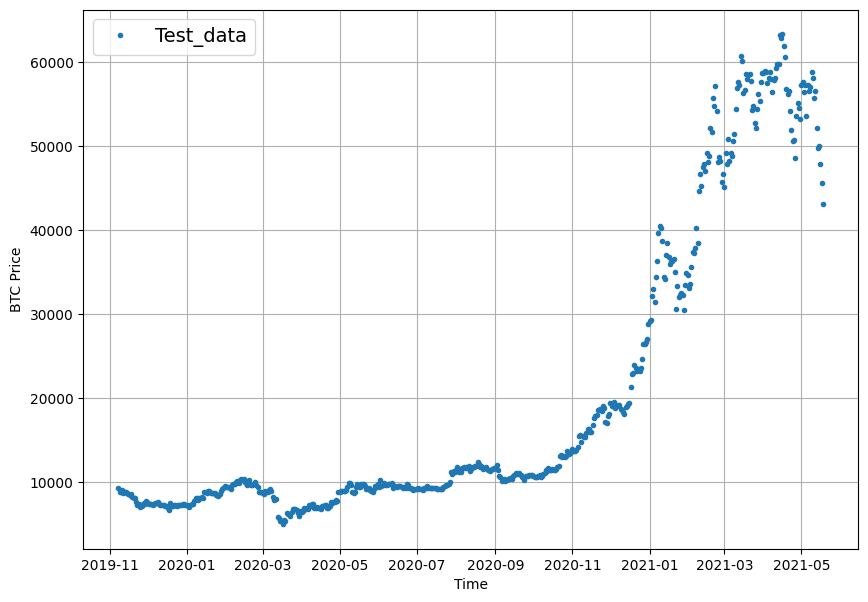

In [21]:
plot_time_series(timesteps=X_train, values=y_train, label="Train_data")
plot_time_series(timesteps=X_test, values=y_test, label="Test_data")

###Modeling experiments

p

##Model 0 Naive forecast (baseline)

In [22]:
#create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [23]:
print(len(X_test), len(naive_forecast))  # Debug the mismatch


558 557


<Figure size 1000x700 with 0 Axes>

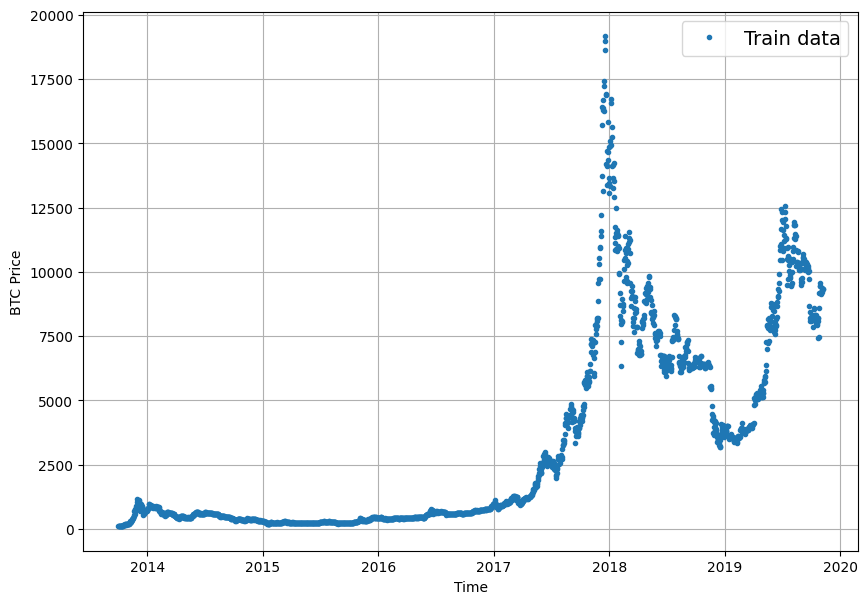

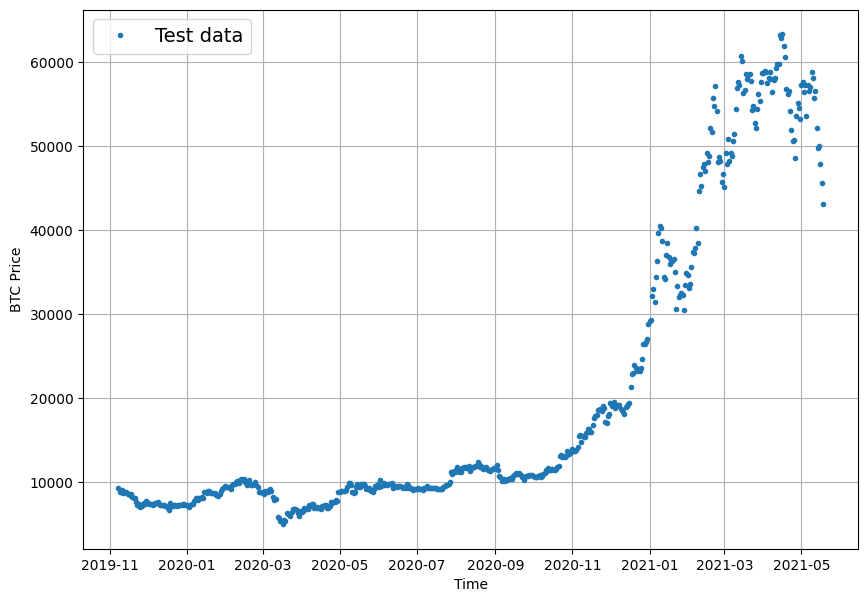

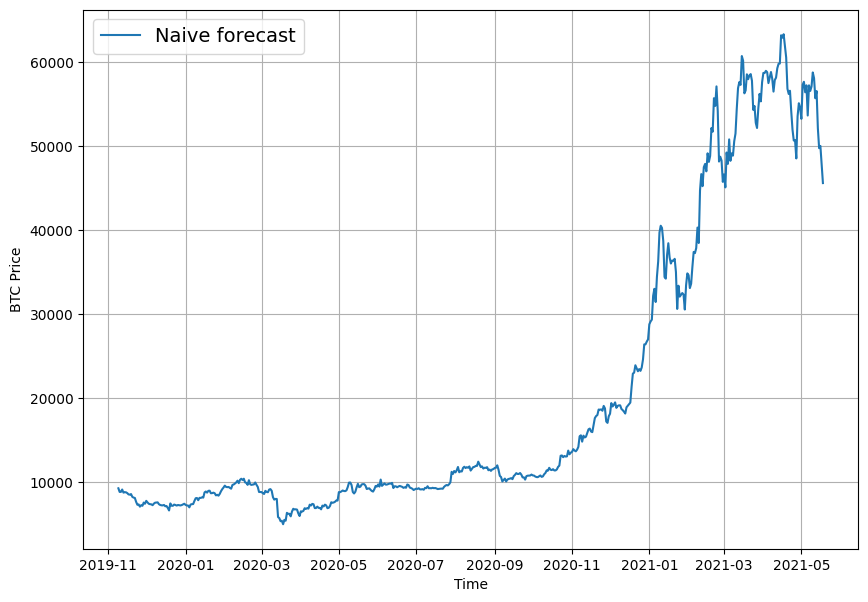

In [24]:
#Plot naive forecast

plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast,format="-", label="Naive forecast")


In [25]:
import tensorflow as tf

In [26]:
#MASE Implementation
def mean_absolute_error_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae/mae_naive_no_season

In [27]:
#Test MASE

mean_absolute_error_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

np.float64(0.9995699939182624)

In [28]:
import tensorflow as tf

def evaluate_preds(y_true, y_pred):
    y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.MeanAbsoluteError()
    mse = tf.keras.metrics.MeanSquaredError()

    mae.update_state(y_true, y_pred)
    mse.update_state(y_true, y_pred)

    mae_val = mae.result().numpy()
    mse_val = mse.result().numpy()
    rmse_val = tf.sqrt(mse.result()).numpy()

    return {
        "mae": mae_val,
        "mse": mse_val,
        "rmse": rmse_val
    }


In [29]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362)}

Format data part 2: Windowing our dataset

In [30]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [31]:
btc_price[:7
          ]

[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795]

In [32]:
#Global varibale for window and horizon size

HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use past week of Bitcoin data

In [33]:
#Function to label windowed data

def get_labeled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]


In [34]:
#test window labelling function
test_window, test_label = get_labeled_window(tf.expand_dims(tf.range(8),axis = 0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> label: 7


In [35]:
# Create function to view NumPy arrays as windows

def make_windows(x, window_size = WINDOW_SIZE, horizon= HORIZON):
  window_steps = np.expand_dims(np.arange(window_size + horizon), axis = 0)
  window_indexes = window_steps + np.expand_dims(np.arange(len(x) - (window_size + horizon -1)), axis= 0).T

  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")
  windowed_array = x[window_indexes]

  # get the labeled windows

  windows, labels = windowed_array[:, :-horizon], windowed_array[:, -horizon]
  return windows, labels


In [36]:
make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([  123.033     ,   124.049     ,   125.96116   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

In [37]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon = HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [38]:
# View the first 3 windows/labels

for i in range(3):
  print(f"Window: {full_windows[i]} -> label: {full_labels}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> label: [  123.033        124.049        125.96116    ... 47885.62525472
 45604.61575361 43144.47129086]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> label: [  123.033        124.049        125.96116    ... 47885.62525472
 45604.61575361 43144.47129086]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> label: [  123.033        124.049        125.96116    ... 47885.62525472
 45604.61575361 43144.47129086]


##Turning windows into training and test dataset

In [39]:
#make train and test sets
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [40]:
#Ctrate train and test windows

train_windows, test_windows, train_labels, test_labels, = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [41]:
train_windows[:5], train_labels[:5
                                ]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [42]:
test_windows[:5]

array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
        9335.75240233, 9226.48582088, 8794.35864452],
       [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
        9226.48582088, 8794.35864452, 8798.04205463],
       [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
        8794.35864452, 8798.04205463, 9081.18687849],
       [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
        8798.04205463, 9081.18687849, 8711.53433917],
       [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
        9081.18687849, 8711.53433917, 8760.89271814]])

##Make a Modelling Checkpoints

In [43]:
import os
import tensorflow as tf

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoints(model_name, save_path="model_experiments"):
    filepath = os.path.join(save_path, model_name + ".keras")
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=filepath,
        verbose=0,
        save_best_only=True
    )


##Model 1: Dense model (window = 7, horizon = 1)


In [44]:
import tensorflow as tf
from tensorflow.keras import layers

#Set random seed
tf.random.set_seed(42)

# 1. construct model

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name = "model_1_dense")

# 2. Compile the model

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])
# 3 fit the model

model_1.fit(x=train_windows,
            y=train_labels,
            epochs = 100,
            verbose =1,
            batch_size=128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoints(model_1.name)]
            )


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1567.0887 - mae: 1567.0887 - mse: 7313336.5000 - val_loss: 2854.5383 - val_mae: 2854.5383 - val_mse: 19161226.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 337.1460 - mae: 337.1460 - mse: 402898.2500 - val_loss: 1124.9519 - val_mae: 1124.9519 - val_mse: 4190205.7500
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 211.3419 - mae: 211.3419 - mse: 208253.1719 - val_loss: 1116.2756 - val_mae: 1116.2756 - val_mse: 4026827.5000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 193.5040 - mae: 193.5040 - mse: 186366.9531 - val_loss: 1079.9681 - val_mae: 1079.9681 - val_mse: 3818517.2500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 184.2924 - mae: 184.2924 - mse: 175711.1719 - val_loss: 1086.2355 - val_mae: 1086.2355 - val_mse: 3706687.5000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 179.2583 - mae: 179.2583 - mse: 167412.5625 - val_loss: 1028.4656 - val_mae: 1028.4656

In [45]:
#Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 286.5470 - mae: 286.5470 - mse: 343311.2812


[572.5706787109375, 572.5706787109375, 1167537.25]

In [46]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 280.8593 - mae: 280.8593 - mse: 341172.4375 


[565.27978515625, 565.27978515625, 1152412.625]

In [47]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)  # return 1D array of predictions

In [48]:
model_1_preds = make_preds(model_1,test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [49]:
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8828.124, 8786.265, 9063.347, 8769.417, 8725.839, 8725.085,
       8686.968, 8517.442, 8447.655, 8539.876], dtype=float32)>

In [50]:
test_labels.shape

(556,)

In [51]:
test_labels.shape, model_1_preds.shape

((556,), TensorShape([556]))

In [52]:
import tensorflow as tf

y_true = tf.cast(test_labels, tf.float32)
y_pred = tf.cast(model_1_preds, tf.float32)

model_1_results = evaluate_preds(y_true=y_true, y_pred=y_pred)
model_1_results


{'mae': np.float32(565.27985),
 'mse': np.float32(1152412.5),
 'rmse': np.float32(1073.5048)}

In [53]:
naive_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362)}

<Figure size 1000x700 with 0 Axes>

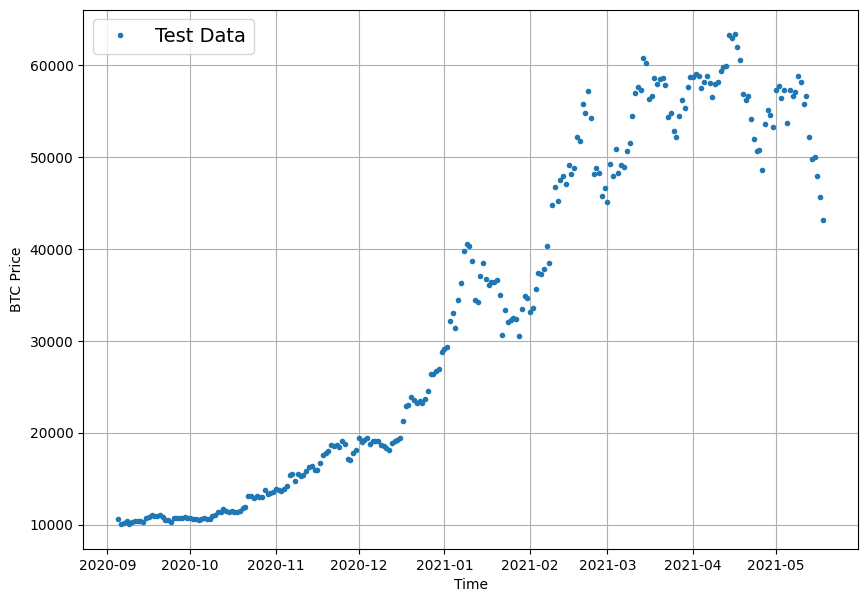

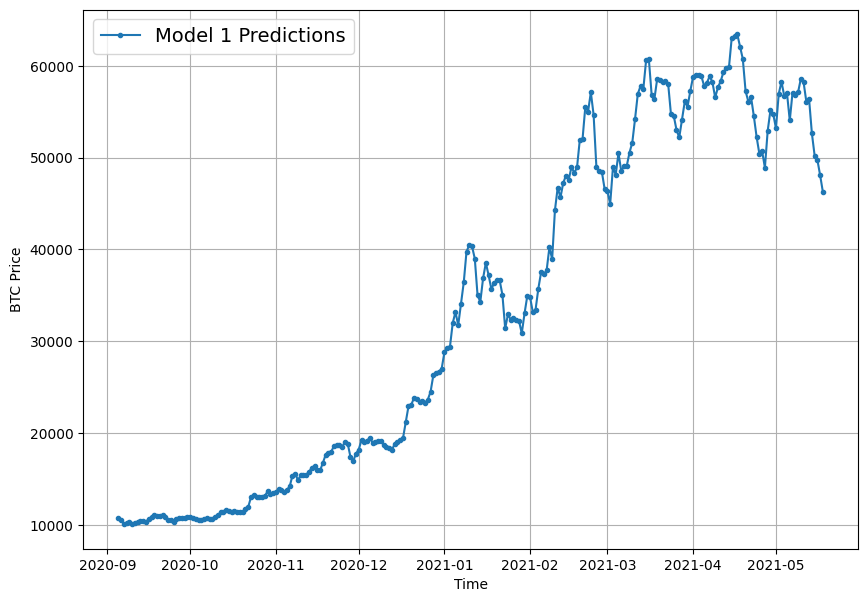

In [54]:
# plot model 1 predictions

offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = test_labels,
                 start = offset,
                 label = "Test Data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format=".-",
                 label = "Model 1 Predictions")

##Model 2: Dense (window = 30, horizon = 1)

In [55]:
HORIZON = 1
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [56]:
len(full_windows), len(full_labels)

(2757, 2757)

In [57]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels = full_labels, test_split = 0.2)

In [58]:
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2205, 2205, 552, 552)

In [59]:
train_windows.shape, train_labels.shape

((2205, 30), (2205,))

In [60]:
tf.random.set_seed(42)
# Build model

model_2 = tf.keras.Sequential([
     layers.Dense(128, activation = "relu"),
     layers.Dense(HORIZON)
], name = "model_2_dense")

#Compile the model
model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

#Fit

model_2.fit(train_windows,
            train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoints(model_2.name)])

In [61]:
#evaluate
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 318.9203 


626.672607421875

In [62]:
#Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 314.6614  


614.0216674804688

In [63]:
# Get forecast predictions
model_2_preds = make_preds(model_2,input_data = test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [64]:
test_labels.shape, model_2_preds.shape

((552,), TensorShape([552]))

In [65]:
import tensorflow as tf

y_true = tf.cast(test_labels, tf.float32)
y_pred = tf.cast(model_2_preds, tf.float32)

model_2_results = evaluate_preds(y_true=y_true, y_pred=y_pred)
model_2_results

{'mae': np.float32(614.0216),
 'mse': np.float32(1274133.2),
 'rmse': np.float32(1128.7751)}

In [66]:
model_1_results

{'mae': np.float32(565.27985),
 'mse': np.float32(1152412.5),
 'rmse': np.float32(1073.5048)}

<Figure size 1000x700 with 0 Axes>

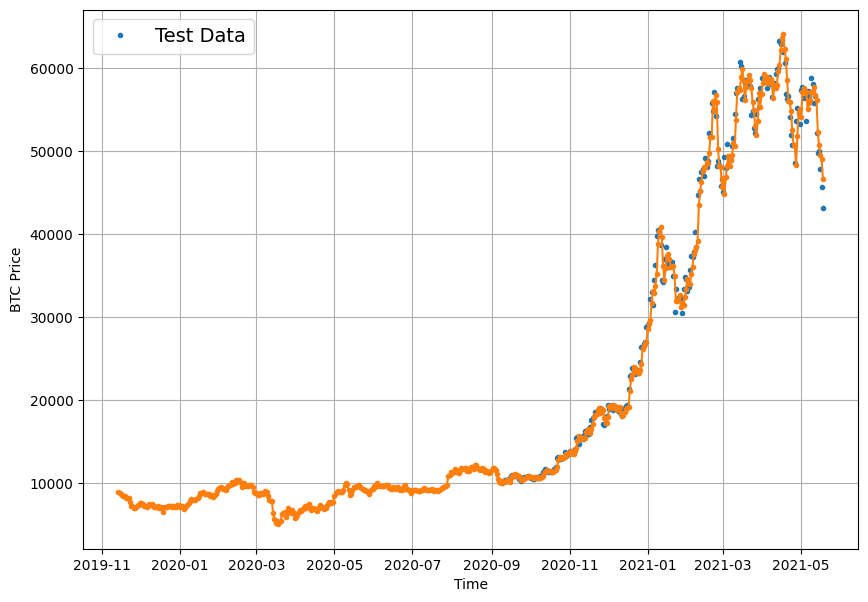

In [67]:
#Plot graph
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = test_labels,
                 start = offset,
                 label = "Test Data")
plt.plot(X_test[-len(test_windows):], model_2_preds, ".-", label = "Model 2 Predictions")

## Model performance   

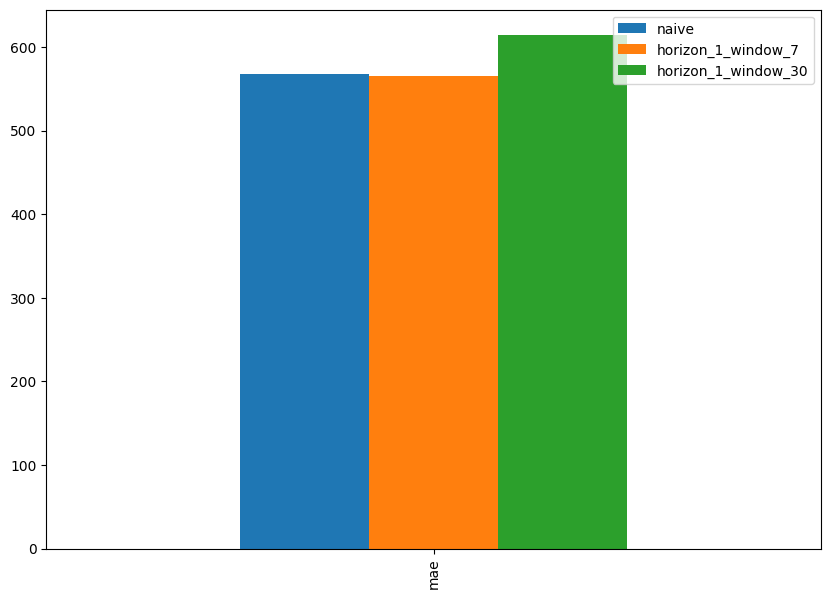

In [68]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30":model_2_results["mae"]},
             index = ["mae"]).plot(figsize=(10,7), kind = "bar");

##Model 3: Conv1D

In [69]:
HORIZON = 1 # predict next day of bitcoin prices
WINDOW_SIZE = 7 #  use previous week worth data


In [70]:
# Create windowed data

full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [71]:
#Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [72]:
# input data shape
train_windows[0].shape

(7,)

In [73]:
#reshape
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [74]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1 ))

In [75]:
#test lembda layer

print(f"Original shape: {x.shape}")
print(f"New shape: {expand_dims_layer(x).shape}")
print(f"New shape: {expand_dims_layer(x)}")


Original shape: (7,)
New shape: (7, 1)
New shape: [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [76]:
import tensorflow as tf
from tensorflow.keras import layers

def expand_dim(x):
    return tf.expand_dims(x, axis=1)


In [77]:
tf.random.set_seed(42)

#Create Conv1d model

model_3 = tf.keras.Sequential([
    layers.Lambda(expand_dim),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation="relu"),
    layers.Dense(HORIZON)
], name = "model_3_conv1D")

#Compile the model

model_3.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam()
                )

# Fit the model

model_3.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose=0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoints(model_3.name)])

In [78]:
model_3.summary()

Model: "model_3_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 1, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1, 128)         │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1, 1)           │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [79]:
# Evaluate the model
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9634.3291 


17165.953125

In [80]:
model_3.save("model_experiments/model_3_conv1D.keras")

In [81]:
# Load back in best performing model
model_3 = tf.keras.models.load_model(
    "model_experiments/model_3_conv1D.keras",
    custom_objects={'expand_dim': expand_dim}
)
model_3.evaluate(test_windows, test_labels)



18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9634.3291  


17165.953125

In [82]:
model_3_preds = make_preds(model_3,test_windows)
model_3_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1315.4517, 1293.2316, 1300.2926, 1314.6296, 1302.5227, 1264.8333,
       1270.9077, 1283.3011, 1231.2377, 1248.188 ], dtype=float32)>

In [83]:
#Evaluate predictions
y_true = tf.cast(tf.squeeze(test_labels), dtype=tf.float32)
y_pred = tf.cast(model_3_preds, dtype=tf.float32)

model_3_results = evaluate_preds(y_true=y_true, y_pred=y_pred)
model_3_results


{'mae': np.float32(17165.955),
 'mse': np.float32(519147840.0),
 'rmse': np.float32(22784.816)}

##Model 4: RNN (LSTM)

In [84]:
tf.random.set_seed(42)

# Build the model
inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Lambda(expand_dim)(inputs)
x = layers.LSTM(128)(x)
output = layers.Dense(HORIZON)(x)
model_4 = tf.keras.Model(inputs, output, name="model_4_LSTM")


# Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoints(model_4.name)])

In [85]:
model_4.summary()

Model: "model_4_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_2 (Lambda)               │ (None, 1, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        69,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,285 (817.52 KB)

 Trainable params: 69,761 (272.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 139,524 (545.02 KB)

In [86]:
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11207.6104


20016.576171875

In [91]:
#Load model
model_4 = tf.keras.models.load_model(
    "model_experiments/model_4_LSTM.keras",
    custom_objects={'expand_dim': expand_dim}
)
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11207.6104 


20016.576171875

In [92]:
#make prediction
model_4_preds = make_preds(model_4,test_windows)
model_4_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([79.79113, 79.79113, 79.79113, 79.79113, 79.79113], dtype=float32)>

In [93]:
y_true = tf.cast(tf.squeeze(test_labels), dtype=tf.float32)
y_pred = tf.cast(model_4_preds, dtype=tf.float32)

model_4_results = evaluate_preds(y_true=y_true, y_pred=y_pred)
model_4_results


{'mae': np.float32(20016.576),
 'mse': np.float32(707860000.0),
 'rmse': np.float32(26605.639)}

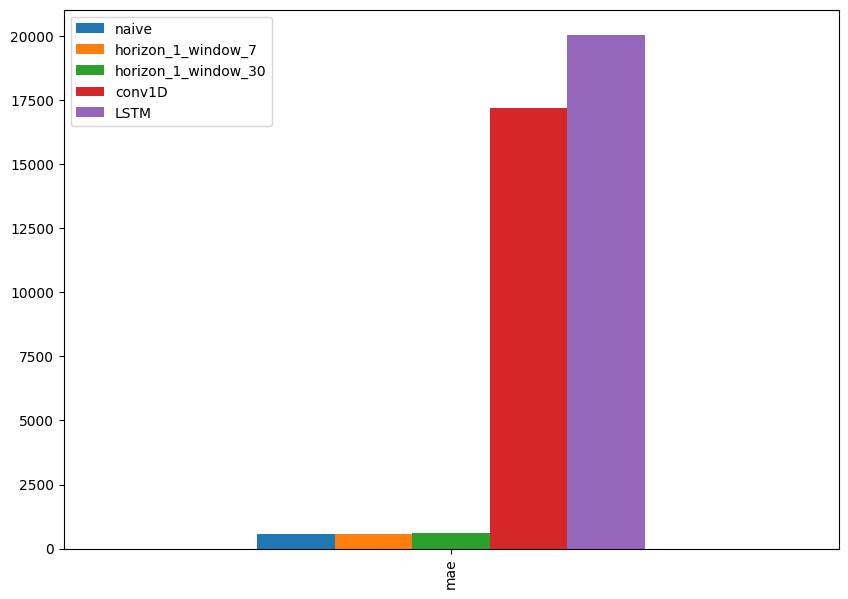

In [94]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30":model_2_results["mae"],
             "conv1D":model_3_results["mae"],
             "LSTM":model_4_results["mae"]},
             index = ["mae"]).plot(figsize=(10,7), kind = "bar");